# This is the dataset which contains house values like 
### 1.House median age
### 2. total tooms
### 3. total bedrooms etc
# we have to predict the median house value 
## This is a regression problem because we have to predict the value in numbers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
house = pd.read_csv("housing\housing.csv")

In [3]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [5]:
house.shape

(20640, 10)

In [6]:
#rcParams.keys()

In [7]:
rcParams['figure.figsize']= 12,5
rcParams['figure.titlesize'] = 'large'
rcParams['figure.titleweight'] = 'normal'
rcParams['font.family']= 'sans-serif'

### Ocean proximity defines the location of house near ocean

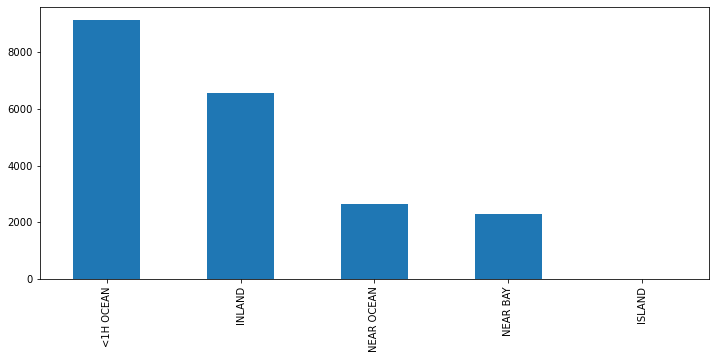

In [8]:
house['ocean_proximity'].value_counts().plot(kind = 'bar')

In [9]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


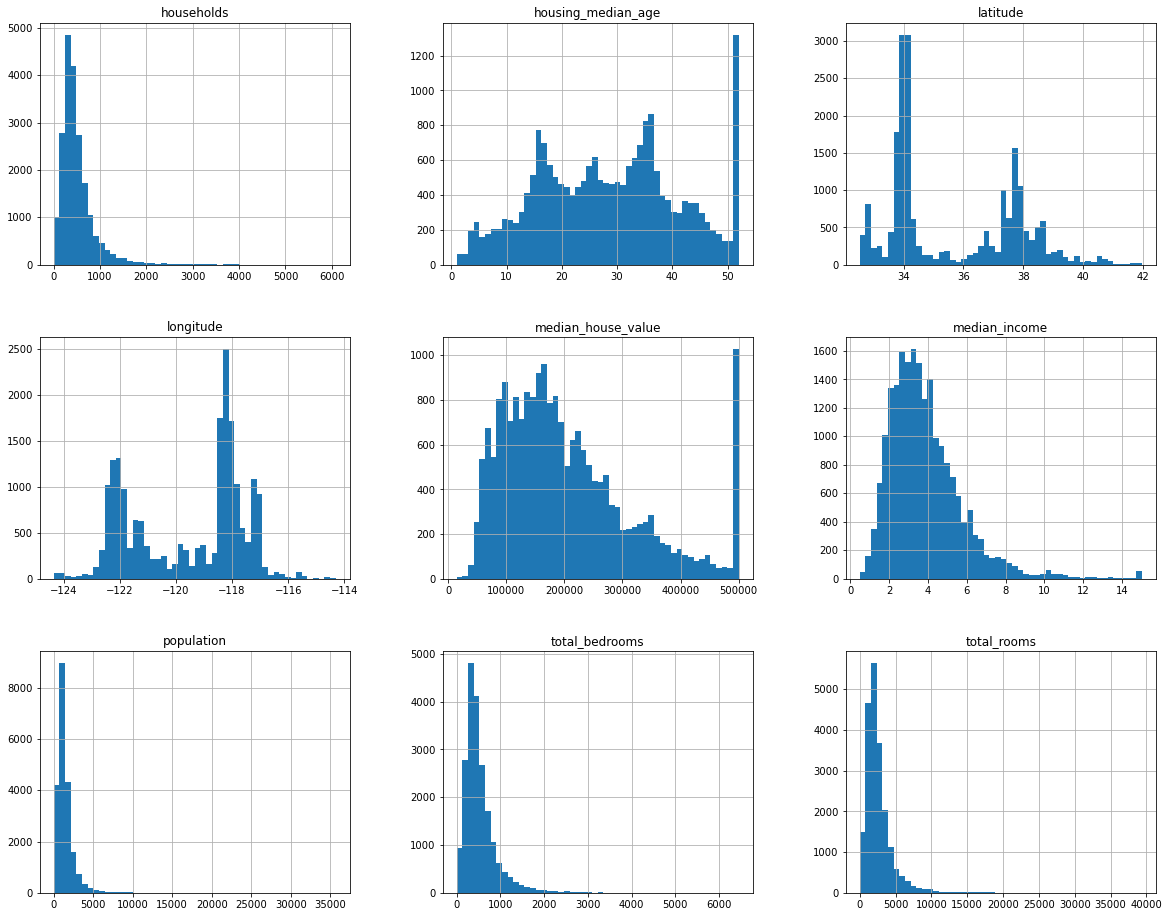

In [10]:
house.hist(bins = 50,figsize = (20,16))
plt.show()

In [11]:
len(house)

20640

### Make copy of the original data

In [12]:
data_copy = house.copy()

In [13]:
house['income_cat'] = pd.cut(house['median_income'],bins = [0.0 ,1.5 ,3.0 ,4.5 ,6.0 ,np.inf],labels = [1,2,3,4,5])

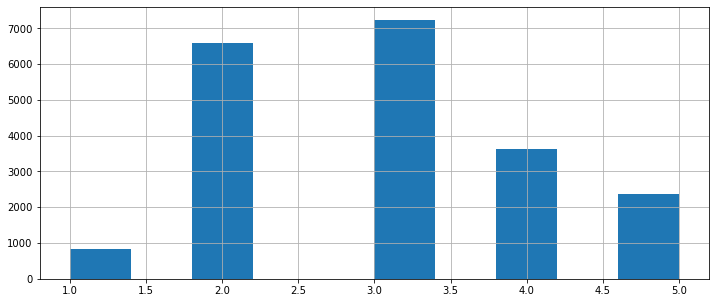

In [14]:
house['income_cat'].hist()

In [15]:
house['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

## Find the missing value and fill it

In [16]:
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_cat              0
dtype: int64

In [17]:
for label, content in house.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

total_bedrooms


In [18]:
for label, content in house.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            
            # Fill missing numeric values with median
            house[label] = content.fillna(content.median())

In [19]:
house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
income_cat            0
dtype: int64

## Attribute combination for better correlation

In [20]:
house['rooms_per_household'] = house['total_rooms']/house['households']
house['bedrooms_per_room'] = house['total_bedrooms']/house['total_rooms']
house['population_per_household'] = house['population'] / house['households']

## Discover and visualize the data

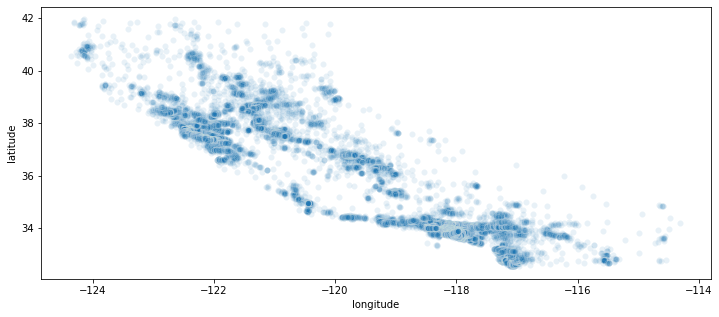

In [21]:
sns.scatterplot(data = house , x ='longitude' , y = 'latitude',alpha= 0.1)

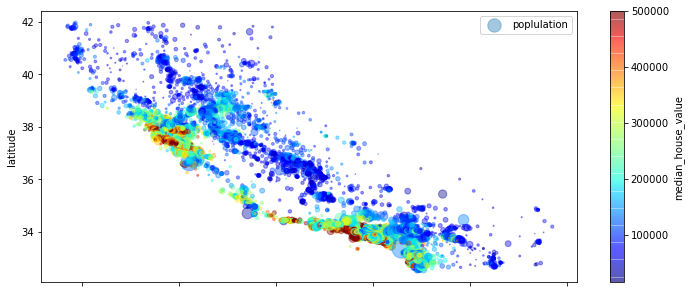

In [22]:
house.plot(kind = 'scatter' , x ='longitude' , y = 'latitude' , alpha = 0.4 , s = house['population'] * 0.01 , label = 'poplulation',c = 'median_house_value' , cmap = plt.get_cmap('jet'),colorbar = True,legend = True)

In [23]:
corr_matrix = house.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

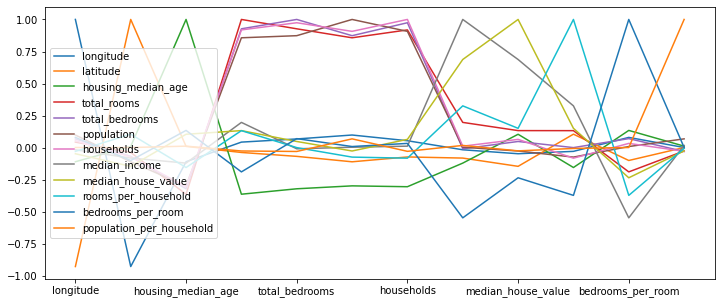

In [24]:
corr_matrix.plot()

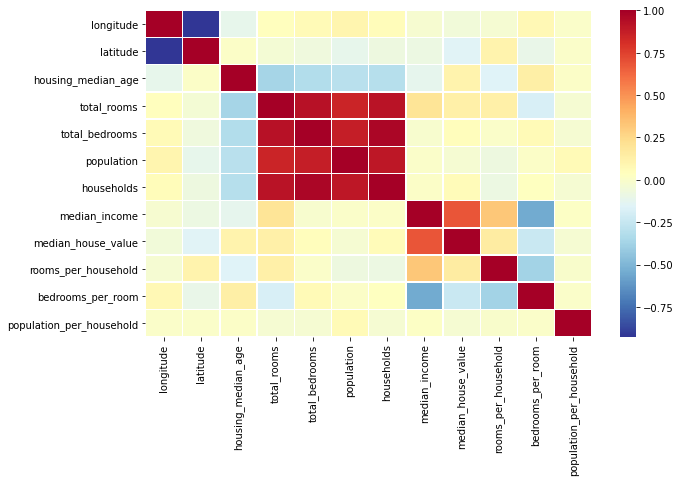

In [25]:
corrmat = house.corr()
f, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corrmat , cmap = 'RdYlBu_r',linewidths = 0.5)

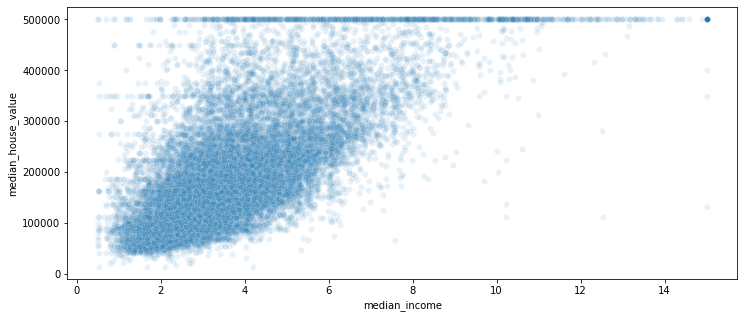

In [26]:
sns.scatterplot(data = house , x = 'median_income' , y = 'median_house_value', alpha = 0.1) ## they have very strong correlation

In [27]:
corr_matrix = house.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

In [28]:
house.drop(['total_bedrooms','total_rooms','population'],axis = 1 , inplace = True)

In [29]:
house

,longitude,latitude,housing_median_age,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,330.0,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,114.0,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,433.0,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,349.0,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


In [30]:
for label, content in house.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            
            # Fill missing numeric values with median
            house[label] = content.fillna(content.median())

In [31]:
house.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
income_cat                  0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

## Handling text and Categorical attributes

In [32]:
for label, content in house.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

ocean_proximity
income_cat


In [33]:
for label, content in house.items():
    if not pd.api.types.is_numeric_dtype(content):
       
        # Turn categories into numbers and add +1
        house[label] = pd.Categorical(content).codes+1

In [34]:
pd.Categorical(house["ocean_proximity"]).codes+1

array([4, 4, 4, ..., 2, 2, 2], dtype=int8)

In [35]:
pd.Categorical(house["income_cat"]).codes+1

array([5, 5, 5, ..., 2, 2, 2], dtype=int8)

## Standard Scaler

In [36]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
print(scaler.fit(house))
StandardScaler()


m = scaler.transform(house)

StandardScaler(copy=True, with_mean=True, with_std=True)


## save the processed data

In [53]:
house.to_csv = ('processed-house-data.csv')

In [54]:
house

,longitude,latitude,housing_median_age,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,126.0,8.3252,452600.0,4,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,1138.0,8.3014,358500.0,4,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,177.0,7.2574,352100.0,4,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,219.0,5.6431,341300.0,4,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,259.0,3.8462,342200.0,4,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,330.0,1.5603,78100.0,2,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,114.0,2.5568,77100.0,2,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,433.0,1.7000,92300.0,2,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,349.0,1.8672,84700.0,2,2,5.329513,0.219892,2.123209


## Split the data into Training and testing

In [55]:
X = house.drop(['median_house_value'],axis = 1)
y = house['median_house_value']

In [56]:
X

,longitude,latitude,housing_median_age,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,126.0,8.3252,4,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,1138.0,8.3014,4,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,177.0,7.2574,4,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,219.0,5.6431,4,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,259.0,3.8462,4,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,330.0,1.5603,2,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,114.0,2.5568,2,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,433.0,1.7000,2,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,349.0,1.8672,2,2,5.329513,0.219892,2.123209


In [48]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X,y, test_size = 0.2 , random_state = 42)

In [49]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((16512, 10), (4128, 10), (16512,), (4128,))

## Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_train,y_train)

0.6300347121989971

In [51]:
y_preds = lin_reg.predict(X_train)

In [52]:
y_preds

array([201550.64146338, 261275.39925882, 241987.96544311, ...,
       193983.92484123, 278000.04192908, 255612.17451728])

In [53]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_train , y_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse/100

703.2506920371892

## RandomForest Regressor


In [54]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
forest_reg.score(X_train,y_train)

0.9738394383323667

In [56]:
forest_pred = forest_reg.predict(X_train)
forest_pred

array([105279.  , 381586.07, 192220.  , ..., 210503.  , 277168.  ,
       326117.01])

In [57]:
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(y_train , forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse/100


187.0049968462494

In [58]:
import joblib 
joblib.dump(forest_pred, 'forest_pred.pkl')
#my_model_loaded = joblib.load('my_model.pkl')

['forest_pred.pkl']

In [59]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Fine Tune your model using RandomizedSearchCV

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
print(RandomForestRegressor())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [62]:
param_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}
    
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions = param_grid,
                        n_iter = 2,cv=5,verbose=True)
    
    
rs_model.fit(X_train , y_train)

     

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [63]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 6,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [64]:
rs_model.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=19,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## Evaluate Model on the Test set

In [65]:
final_model = rs_model.best_estimator_

In [66]:
final_predictions = final_model.predict(X_test)

In [69]:
final_mse = mean_squared_error(y_test , final_predictions)
final_rmse = np.sqrt(final_mse)

In [70]:
final_rmse

55822.1196056261

In [71]:
final_predictions

array([ 63011.40279129,  88850.6188433 , 408409.51676723, ...,
       488793.95954506,  79689.85982437, 174954.21048482])

In [72]:
df_preds = pd.DataFrame()
df_preds["median_income"] = X_test['median_income']
df_preds["median_house_value"] = final_predictions
df_preds

,median_income,median_house_value
20046,1.6812,63011.402791
3024,2.5313,88850.618843
15663,3.4801,408409.516767
20484,5.7376,247951.830371
9814,3.7250,227552.868950
...,...,...
15362,4.6050,207745.442500
16623,2.7266,198829.435783
18086,9.2298,488793.959545
2144,2.7850,79689.859824


In [73]:
final_model.feature_importances_

array([4.34569567e-02, 4.53164113e-02, 4.17039593e-02, 7.27268627e-03,
       6.25299095e-01, 7.90453281e-02, 5.05452153e-05, 8.69864960e-03,
       9.08076097e-03, 1.40075608e-01])

In [75]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

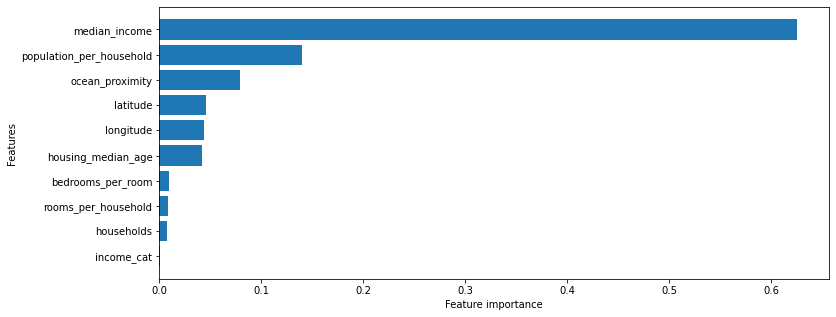

In [77]:
plot_features(X_train.columns, final_model.feature_importances_)

In [87]:
y_train

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [85]:
df_preds

,median_income,median_house_value
20046,1.6812,63011.402791
3024,2.5313,88850.618843
15663,3.4801,408409.516767
20484,5.7376,247951.830371
9814,3.7250,227552.868950
...,...,...
15362,4.6050,207745.442500
16623,2.7266,198829.435783
18086,9.2298,488793.959545
2144,2.7850,79689.859824
